In [77]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('single_data.csv')
data

,Unnamed: 0,operating_airline,departure_country_iata,arrival_country_iata,total_seats,type,date,total_month_seats,organization_code_iata,organization_code_icao,...,covid,cap,floor,total_month_seats_normalized,y_normalized,origin,country,flight_type,stringency_index,stringency_index_normalized
0,0,SY,US,DO,2745,Leisure,2020-01,446967,SY,SCX,...,False,100,0,0.809553,0.850467,United States,US,external,0.00,0.000000
1,1,SY,US,DO,2745,Leisure,2020-01,446967,SY,SCX,...,False,100,0,0.809553,0.850467,United States,US,external,0.00,0.000000
2,2,SY,US,DO,2745,Leisure,2020-01,446967,SY,SCX,...,False,100,0,0.809553,0.850467,United States,US,external,0.00,0.000000
3,3,SY,US,DO,2745,Leisure,2020-01,446967,SY,SCX,...,False,100,0,0.809553,0.850467,United States,US,external,0.00,0.000000
4,4,SY,US,DO,2745,Leisure,2020-01,446967,SY,SCX,...,False,100,0,0.809553,0.850467,United States,US,external,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,9659,SY,US,PR,183,Leisure,2021-09,387453,SY,SCX,...,False,100,0,0.686640,0.531231,United States,US,external,52.31,0.693215
9660,9660,SY,US,PR,183,Leisure,2021-09,387453,SY,SCX,...,False,100,0,0.686640,0.531231,United States,US,external,52.31,0.693215
9661,9661,SY,US,PR,183,Leisure,2021-09,387453,SY,SCX,...,False,100,0,0.686640,0.531231,United States,US,external,52.30,0.693082
9662,9662,SY,US,PR,183,Leisure,2021-09,387453,SY,SCX,...,False,100,0,0.686640,0.531231,United States,US,external,52.30,0.693082


In [73]:
# Prepare data
df = data[['date', 'total_month_seats', 'flight_type', 'stringency_index', 'type', 'y']]
df = df.rename(columns={'date': 'ds'})

# Convert "type" column to one-hot encoded form
df = pd.get_dummies(df, columns=['type'])
df['int_ext'] = df['flight_type'].replace({'internal': 1, 'external': 0}).astype(int)
df = df.drop('flight_type', axis = 1)
df

,ds,total_month_seats,stringency_index,y,type_Leisure,int_ext
0,2020-01,446967,0.00,77.574101,1,0
1,2020-01,446967,0.00,77.574101,1,0
2,2020-01,446967,0.00,77.574101,1,0
3,2020-01,446967,0.00,77.574101,1,0
4,2020-01,446967,0.00,77.574101,1,0
...,...,...,...,...,...,...
9659,2021-09,387453,52.31,58.366363,1,0
9660,2021-09,387453,52.31,58.366363,1,0
9661,2021-09,387453,52.30,58.366363,1,0
9662,2021-09,387453,52.30,58.366363,1,0


In [74]:
# DUMMY VARIABLE TYPE LEISURE NEEDS TO BE REPROGRAMMED

In [83]:
# Load in the merged data

data = pd.read_csv('merged_data.csv')
data

# Group by airline_iata, year, and month and calculate sum of seats
data_summed = data.groupby(['airline_iata', 'date']).agg({'seats': 'sum'}).reset_index()
merged_data = data.merge(data_summed, on = ['airline_iata', 'date'])
merged_data
# data_summed = data_summed.drop('date', axis = 1).drop('airline_iata', axis = 1)

# data_summed = data.groupby(['airline_iata', 'date'])['seats'].transform('sum')
# data_summed

,country_iata,date,gdp,total_cases,total_deaths,stringency_index,reproduction_rate,population,population_density,airline_iata,passenger_load_factor_pct,seats_x,airline_type,seats_y
0,AR,2020-04,-14.975656,4428,218,88.89,1.03,45510324,16.177,AR,47.502411,534,Mainline,11036
1,AR,2020-04,-14.975656,4428,218,88.89,1.03,45510324,16.177,AR,47.502411,170,Mainline,11036
2,AR,2020-04,-14.975656,4428,218,88.89,1.03,45510324,16.177,AR,47.502411,170,Mainline,11036
3,AR,2020-04,-14.975656,4428,218,88.89,1.03,45510324,16.177,AR,47.502411,811,Mainline,11036
4,AR,2020-04,-14.975656,4428,218,88.89,1.03,45510324,16.177,AR,47.502411,3296,Mainline,11036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28877,US,2021-04,1.707016,32468041,572157,54.09,0.87,338289856,35.608,ZW,80.200567,100,Regional,100
28878,US,2021-07,0.656694,35107388,609481,46.67,1.47,338289856,35.608,ZW,85.040905,350,Regional,350
28879,US,2021-07,0.656694,35107388,609481,46.67,1.47,338289856,35.608,YV,85.924310,456,Regional,526
28880,US,2021-07,0.656694,35107388,609481,46.67,1.47,338289856,35.608,YV,85.924310,70,Regional,526


In [87]:
# merged_data = merged_data.drop(['seats_x'], axis=1).drop_duplicates(subset=['country_iata','date'])
merged_data[10:]

,country_iata,date,gdp,total_cases,total_deaths,stringency_index,reproduction_rate,population,population_density,airline_iata,passenger_load_factor_pct,airline_type,seats_y
234,AT,2020-07,11.302099,20873,848,37.96,1.04,8939617,106.749,OS,57.922078,Mainline,375741
301,AT,2020-10,-1.922985,101467,1431,64.81,1.53,8939617,106.749,OS,44.842105,Mainline,405094
374,AT,2021-01,-1.008203,409286,9393,82.41,0.93,8939617,106.749,OS,51.724138,Mainline,216720
441,AT,2021-04,4.110187,611569,12416,76.85,0.85,8939617,106.749,OS,41.975309,Mainline,423112
521,AT,2021-07,4.314871,654243,13135,47.72,1.25,8939617,106.749,OS,69.585879,Mainline,1088533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25908,US,2020-10,0.963213,9176350,230540,66.20,1.22,338289856,35.608,G4,63.585175,Low-cost,1279590
25913,US,2021-01,1.542792,26357096,446554,71.76,0.83,338289856,35.608,G4,57.832710,Low-cost,993471
25925,US,2021-04,1.707016,32468041,572157,54.09,0.87,338289856,35.608,G4,64.449834,Low-cost,1634577
25941,US,2021-07,0.656694,35107388,609481,46.67,1.47,338289856,35.608,G4,81.838983,Low-cost,2382021


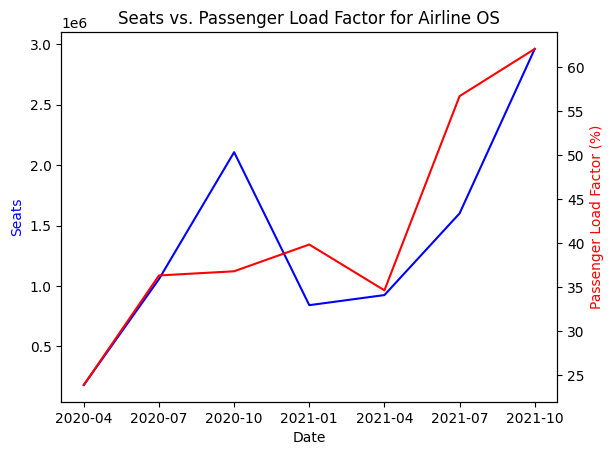

In [93]:
# Filter dataframe by airline_iata "OS"
os_data = merged_data[merged_data['airline_iata'] == 'BA']

# create figure and axis objects
fig, ax = plt.subplots()

# plot seats on primary y-axis
ax.plot(os_data['date'], os_data['seats_y'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Seats', color='blue')

# instantiate a second axes that shares the same x-axis
ax2 = ax.twinx()

# plot passenger_load_factor_pct on secondary y-axis
ax2.plot(os_data['date'], os_data['passenger_load_factor_pct'], color='red')
ax2.set_ylabel('Passenger Load Factor (%)', color='red')

# set title
plt.title('Seats vs. Passenger Load Factor for Airline OS')

# display the plot
plt.show()

In [117]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader#
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

# Load the merged_data
df = merged_data
df

,country_iata,date,gdp,total_cases,total_deaths,stringency_index,reproduction_rate,population,population_density,airline_iata,passenger_load_factor_pct,airline_type,seats_y
0,AR,2020-04-01,-14.975656,4428,218,88.89,1.03,45510324,16.177,AR,47.502411,Mainline,11036
19,AR,2020-07-01,11.893161,191302,3543,90.74,1.15,45510324,16.177,AR,64.479699,Mainline,12120
39,AR,2020-10-01,4.539397,1166924,31002,81.94,0.88,45510324,16.177,AR,46.831346,Mainline,35868
56,AR,2021-01-01,3.452561,1927239,47974,79.17,0.90,45510324,16.177,AR,69.418114,Mainline,492983
80,AR,2021-04-01,-0.787435,2977363,63865,71.76,0.95,45510324,16.177,AR,64.151369,Mainline,426100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25908,US,2020-10-01,0.963213,9176350,230540,66.20,1.22,338289856,35.608,G4,63.585175,Low-cost,1279590
25913,US,2021-01-01,1.542792,26357096,446554,71.76,0.83,338289856,35.608,G4,57.832710,Low-cost,993471
25925,US,2021-04-01,1.707016,32468041,572157,54.09,0.87,338289856,35.608,G4,64.449834,Low-cost,1634577
25941,US,2021-07-01,0.656694,35107388,609481,46.67,1.47,338289856,35.608,G4,81.838983,Low-cost,2382021


In [118]:
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.LSTM(64))
model.add(tensorflow.keras.layers.Dense(10))

NameError: name 'tensorflow' is not defined

In [113]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(num_timesteps, num_features)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Make predictions on the test set
test_predictions = model.predict(test_dataset)

NameError: name 'num_timesteps' is not defined

In [98]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%Y-%m")

# Sort the data by date
df = df.sort_values(by=['date'])

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [99]:
# Define a custom PyTorch dataset
class AirlineDataset(Dataset):
    def __init__(self, df):
        self.seats_y = df['seats_y'].values
        self.date = df['date'].values.astype(float)

    def __len__(self):
        return len(self.seats_y)

    def __getitem__(self, idx):
        return self.date[idx], self.seats_y[idx]

# Define a PyTorch dataloader for the train and test sets
batch_size = 1
train_dataset = AirlineDataset(train_df)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

test_dataset = AirlineDataset(test_df)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [100]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        return out

# Initialize the LSTM model
input_size = 1 # We only have one feature: date
hidden_size = 16 # Number of neurons in the hidden layer
output_size = 1 # We want to predict one value: seats_y
num_layers = 2 # Number of LSTM layers

lstm = LSTM(input_size, hidden_size, output_size, num_layers)

In [101]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)

# Train the LSTM model
num_epochs = 100

In [104]:
# Define the device (use GPU if available, otherwise use CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model and data to the device
lstm.to(device)
train_dataloader = [(date.to(device), seats_y.to(device)) for date, seats_y in train_dataloader]

In [ ]:
X_train = []
y_train = []

# train_size = int(len(df) * 0.8)

for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# train_df = df[]
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

model = Prophet()
for regressor in ['total_month_seats', 'int_ext', 'stringency_index', 'type_Leisure']:
    model.add_regressor(regressor)
model.fit(train_df)

03:12:03 - cmdstanpy - INFO - Chain [1] start processing
03:12:14 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# df['type'] = df['flght_type'].astype('category')

# df = pd.get_dummies(df, columns=['flight_type'])

# df = df.rename(columns={'y'})

# Train-test split
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Train model
model = Prophet()
for regressor in ['total_month_seats', 'int_ext', 'stringency_index', 'type_Leisure']:
    model.add_regressor(regressor)
model.fit(train_df)

03:20:42 - cmdstanpy - INFO - Chain [1] start processing
03:20:53 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
print(df.columns)

Index(['ds', 'total_month_seats', 'stringency_index', 'y', 'type_Leisure',
       'int_ext'],
      dtype='object')


In [ ]:
future = model.make_future_dataframe(periods=365) # extend the dataframe for 365 days in the future
new_df = pd.DataFrame(index=future.index, columns=['total_month_seats'])
new_df['total_month_seats'] = test_df['total_month_seats'].values[:len(future)] # use only the values of test_df that match the length of future
new_df['int_ext'] = test_df['int_ext'].values[:len(future)]
new_df['stringency_index'] = test_df['stringency_index'].values[:len(future)]
new_df['type_Leisure'] = test_df['type_Leisure'].values[:len(future)]
future = pd.concat([future, new_df], axis=1)
forecast = model.predict(future) # predict the values for the future period

new_df = pd.DataFrame(index=future.index, columns=['total_month_seats'])
new_df['total_month_seats'] = test_df['total_month_seats'].values
future = pd.concat([future, new_df], axis=1)

forecast = model.predict(future) # predict the values for the future period

fig = model.plot(forecast, xlabel='Date', ylabel='Total Month Seats', figsize=(12, 6))
plt.title('Forecasted Total Month Seats')
plt.show()

ValueError: Length of values (1933) does not match length of index (381)

In [ ]:
# Generate the forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Passenger Load Factor (%)')

# Customize the plot
plt.title('Passenger Load Factor Forecast')
plt.legend(['Actual', 'Trend', 'Seasonality', 'Forecast'])

# Show the plot
plt.show()

In [ ]:
forecast = model.predict(future)

#future = model.make_future_dataframe(periods=365)
#forecast = model.predict(future

# Plot the results
fig = model.plot(forecast, include_legend=True)

# Use sklearn to calculate the MSE for the validation data

# Intersect the validation data with the forecast data
# forecast.ds == df_val.time merge
df_val = df_val.merge(forecast, left_on='time', right_on='ds')

# Calculate the MSE with sklearn
y_actual = df_val['passenger_load_factor_pct']
y_pred = df_val['trend']

print("MSE: ", mean_squared_error(y_actual, y_pred))

ValueError: Regressor 'total_month_seats' missing from dataframe

In [ ]:
# Make predictions
future = model.make_future_dataframe(periods=len(test_df))
for regressor in ['total_month_seats', 'flight_type', 'stringency_index', 'type']:
    future[regressor] = test_df[regressor].values
forecast = model.predict(future)

# Evaluate model
mape = np.mean(np.abs((forecast['yhat'][-len(test_df):] - test_df['y_original']) / test_df['y_original'])) * 100
print('MAPE: %.2f%%' % mape)